When someone gives us data and asks us to make a prediction, the type of outcome determines whether we should use regression analysis or classification analysis.

If the outcome variable is continuous in nature (for example, it consists of numerical values such as natural numbers, decimals, or real values), then we use regression analysis.

If the outcome variable is categorical in nature (for example, it represents labels or classes such as “Yes/No,” “Male/Female,” or “Low/Medium/High”), then we use classification analysis.

# Linear Regression
- Simple Linear Regression
- Multi-Linear Regression
- Lasso Regression
- Ridge Regression

# non-Linear Regression
- Polynomial Regression
- Decision tree Regression
- Random Forest Regression
- Suport Vector Regression
- K-Nearest Neighbors Regression

In [1]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## 1. Simple-Linear Regression

### Theory

In [2]:
# Simple Linear Regression is a type of Regression algorithms that models the relationship between a dependent variable and a single independent variable.

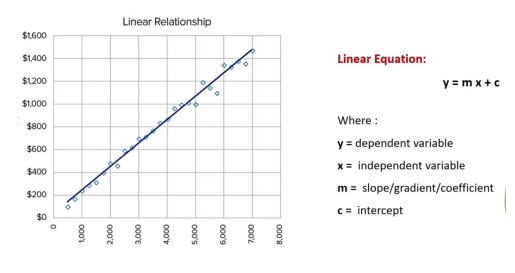

In [3]:
img = mpimg.imread('Image/SimpleLinearRegression.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
# y = Output
# x = user Input
# m = difference
# c = when x = 0 then y = ?

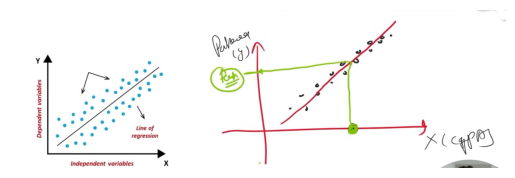

In [5]:
img = mpimg.imread('Image/linearExample.png')
plt.imshow(img)
plt.axis('off')
plt.show()

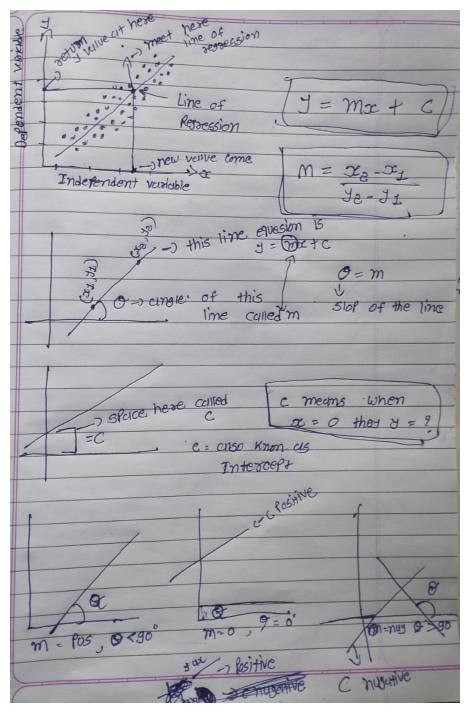

In [6]:
plt.figure(figsize=(20, 9))
img = mpimg.imread('Image/explain Linear.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

### Prectical

In [7]:
df = pd.read_csv('../Dataset/placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


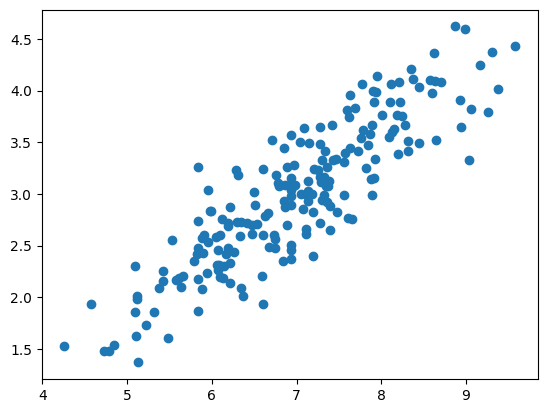

In [8]:
# First let's check our data follow Linear Regrestion or not ?
plt.scatter(x=df.cgpa, y=df.package)
plt.show()

In [9]:
df.isnull()

,cgpa,package
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [10]:
# When we are work with Scikit learn then our dataset must be 2-dimentional
x = df[['cgpa']]
print(x.ndim)
y = df[['package']]
y.head(3)

2


,package
0,3.26
1,1.98
2,3.25


### Split data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

### Import LinearRegrression

In [12]:
from sklearn.linear_model import LinearRegression

### Train Model

In [13]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Check value of 'm' and 'c' in 'y = mx + c' 

In [14]:
m = lr.coef_[0]      # coefficient
c = lr.intercept_     # intercept
print(m, c)

[0.57111357] [-0.99989518]


### Prediction Chart

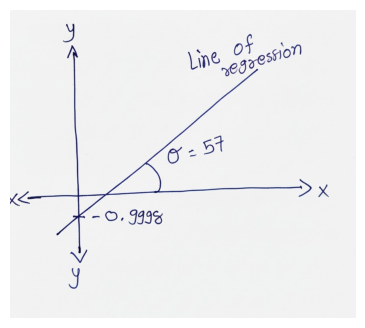

In [15]:
plt.figure(figsize=(8, 4))
img = mpimg.imread('Image/my_pre.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

### Predict Package using CGPA

In [16]:
pre = lr.predict([[6.89]])
pre[0]

array([2.93507732])

In [17]:
# if cgpa is 6.89 then cgpa must be 3.26 but that show 2.935 so there is so diffrence
df.iloc[:1]

,cgpa,package
0,6.89,3.26


In [18]:
# Let's veryfy output with y = mx + c
x = 6.89
print(m*x+c)

[2.93507732]


### Let's check Accureccy

In [19]:
# For check accureccy we give that 25% of our data that we just split

In [20]:
# here we can show our prediction is 77.747% right which not good 
lr.score(x_test, y_test)*100

77.74721122516276

In [21]:
y_pred = lr.predict(df[['cgpa']])

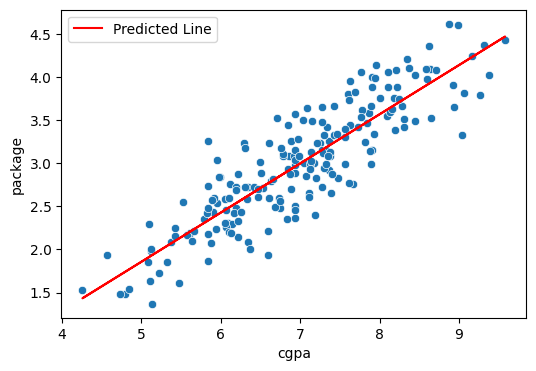

In [22]:
# Let's create line using code
# here x is start with 4 but when we are increse arrow that touch y axis at -0.998
plt.figure(figsize=(6, 4))
sns.scatterplot(x='cgpa', y='package', data=df)
plt.plot(df['cgpa'], y_pred, c='r', label="Predicted Line")
plt.legend()
plt.show()

## Multiple Linear Regression

In [23]:
# Multiple Linear Regression is an extenstion of simple linear regression as it takes
#    more than one predictor variable to predict the response variable.

In [24]:
old = pd.read_csv('../Dataset/Salary_Data.csv')
old

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [25]:
df = old[['Age', 'Years of Experience', 'Salary']]
df = df.rename(columns={'Years of Experience': 'Experiance'})
df.head()

,Age,Experiance,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0


In [26]:
df = df.dropna()
df = df.drop_duplicates()

In [27]:
df.shape

(1283, 3)

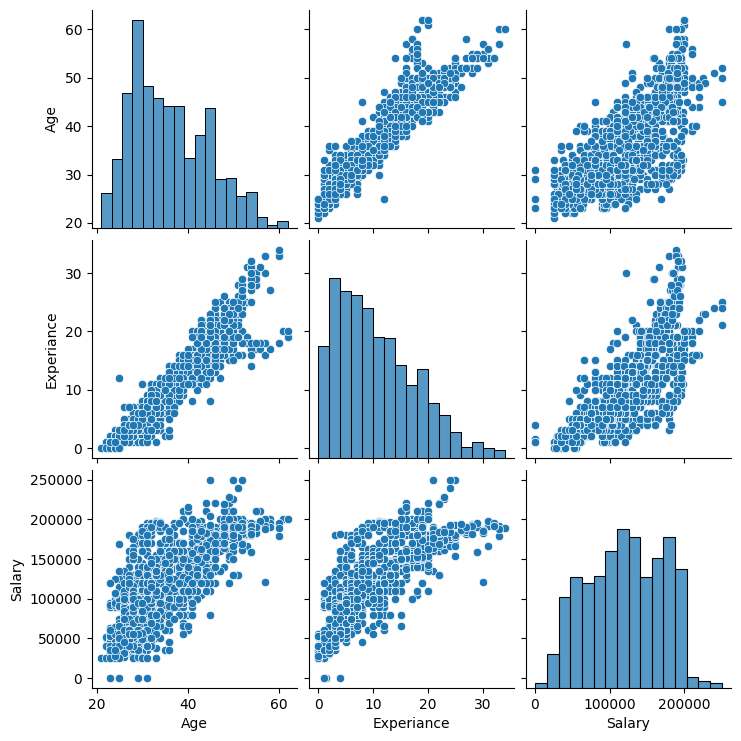

In [28]:
# Here we can show they are make little bit better linear relation
sns.pairplot(data=df)
plt.show()

<Axes: >

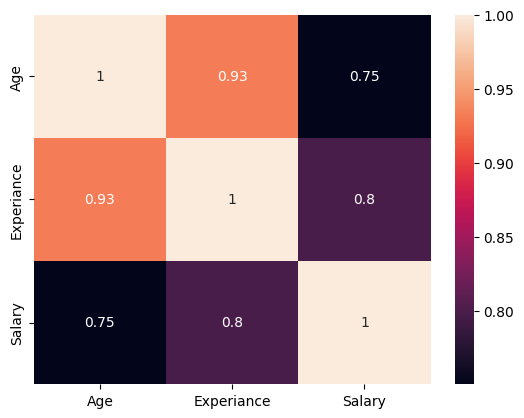

In [29]:
# Let's check relation using Co-Relation
# Here we can show 0.93, 0.75, 0.8 very near to 1 so thay have good linear regrestion
sns.heatmap(data=df.corr(), annot=True)

In [30]:
x = df.iloc[:, :-1]
y = df['Salary']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
x.ndim

2

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
lr.coef_

array([  90.88321737, 5604.81832299])

In [38]:
lr.intercept_

np.float64(60686.67640596099)

In [39]:
# y = m1x1 + m2x2 + m3x3 +....+ c
# y = (90.88321737*Age) + (5604.81832299*Experiance) + 60686.67640596099

In [40]:
lr.score(x_test, y_test)*100

62.54522120242403

In [41]:
lr.predict([[32, 5]])

array([91619.03097674])

## Polynomial Regression

In [42]:
data = {
    'Level': list(range(1, 101)),
    'Salary': [
        30000, 32000, 34000, 36000, 38000, 41000, 44000, 48000, 52000, 57000,
        63000, 70000, 78000, 87000, 97000, 108000, 120000, 133000, 147000, 162000,
        178000, 195000, 213000, 232000, 252000, 273000, 295000, 318000, 342000, 367000,
        393000, 420000, 448000, 477000, 507000, 538000, 570000, 603000, 637000, 672000,
        708000, 745000, 783000, 822000, 862000, 903000, 945000, 988000, 1032000, 1077000,
        1123000, 1170000, 1218000, 1267000, 1317000, 1368000, 1420000, 1473000, 1527000, 1582000,
        1638000, 1695000, 1753000, 1812000, 1872000, 1933000, 1995000, 2058000, 2122000, 2187000,
        2253000, 2320000, 2388000, 2457000, 2527000, 2598000, 2670000, 2743000, 2817000, 2892000,
        2968000, 3045000, 3123000, 3202000, 3282000, 3363000, 3445000, 3528000, 3612000, 3697000,
        3783000, 3870000, 3958000, 4047000, 4137000, 4228000, 4320000, 4413000, 4507000, 4602000
    ]
}
df = pd.DataFrame(data)
df.head(3)

,Level,Salary
0,1,30000
1,2,32000
2,3,34000


In [43]:
# Here We can show both of them are highly co-releted
df.corr()

,Level,Salary
Level,1.000000,0.963058
Salary,0.963058,1.000000


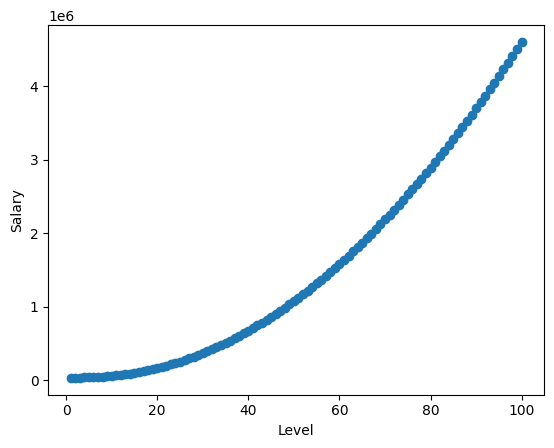

In [44]:
plt.scatter(df['Level'], df['Salary'])
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [45]:
x = df[['Level']]
y = df['Salary']

In [46]:
# Here we are Convert our data to PolynomialFeatures

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
x.shape

(100, 1)

In [49]:
# if our dataset follow using degree 2 then it's ok and if not then increase value and check again
pf = PolynomialFeatures(degree=2)
pf.fit(x)
new = pf.transform(x)
# degree is 2 then column create 3, if degree 3 column create 4 so on..
new.shape

(100, 3)

In [50]:
lr.coef_

array([  90.88321737, 5604.81832299])

In [51]:
# Meaning of each term:
# y  -> Dependent (target) variable
# x1 -> Independent (predictor) variable
# b0 -> Intercept (constant term)
# b1, b2, ..., bn -> Coefficients for each polynomial power
# n  -> Degree of the polynomial

In [52]:
# y = b0 + b1*x1 + b2*(x1**2) + b3*(x1**3) + ... + bn*(x1**n)
# y = 0 + -4262.94032855*x1 + 498.10414106*x2

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(new, y, test_size=0.25)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
lr.score(x_test, y_test)

0.9999990668886588

In [58]:
prd = lr.predict(new)

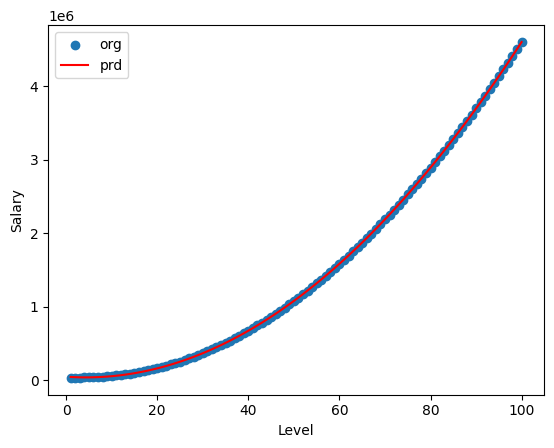

In [59]:
plt.scatter(df['Level'], df['Salary'], label='org')
plt.plot(df['Level'], prd, c='r', label='prd')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [60]:
# ok, now if we want to check our sellery using level then fist we need to transform it

In [61]:
test = pf.transform([[45]])
test

array([[1.000e+00, 4.500e+01, 2.025e+03]])

In [62]:
# So here, we can check at leveal 45 our sellary is 852308
lr.predict(test)

array([862426.52866981])

## Cost Function

In [63]:
# A cost function is an important parameter that determines 
# how well a machine learning model performs for a given dataset

# Cost function is a measure of how wrong the model is in estimating 
# the relationship between X(input) and Y(output) Parameter.

## Types of Cost Function:

In [64]:
# Cost Function just help us to find best Prediction line

### 1. Regression Cost Function
#### Regression model are used to make a prediction for the continous Variables.
##### - MSE(Mean Square Error)
##### - RMSE(Root Mean Square Error)
##### - MAE(Mean Absolute Error)
##### - r² Accuracy

### 2. Classification Cost Function
##### - Cross-Entropy Loss (Log Loss)
##### - Hinge Loss

## 1.Regression Cost Function

### I. MSE(Mean Square Error)
##### in this algo:
    1/n --> n = row in dataset
    yᵢ = row data
    ŷᵢ = Pridicted value of yᵢ
Mean Squared Errors is the mean squared difference between the actual and predicted values. MSE penalizes high errors caused by outliers by squaring the errors.

mean squared error is also knowns as L2 Loss

$$
\text{Mean Squared Error} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


II. MAE(Mean Absolute Error)
##### in this algo:
    1/n --> n = row in dataset
    yᵢ = row data
    ŷᵢ = Pridicted value of yᵢ
    || = use for mode
We are not use Square. here, we are use ||

Mean Absolute Error is the mean absolute difference between the actual values and the predicted values.

MAE is more robust to outliers. the insensitivity to outliers is because it does the penalize high errors caused by outliers.

MAE is better than MSE

$$
\text{Mean Absolute Error} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

In [65]:
# y = mx + c
# Here pridict best line both of function use brute force where 
# we are predict m and c only
# change m and c and check error acording to it
# when we are find best (m, θ-curve) and c. that have low errors. best differnece with all dots(.)

# Regularization

This is a form of regression, that constrains/regularizes or shrinks the coefficient estimates towards to zero.

This technique discourages learning a more complex or flexible mode, so as to avoid the risk of overfitting.

### Regularization can achieve this motive with a 2 technique
##### - Ridge Regularization/L2
##### - Lasoo Regularization/L1

## 1. Lasoo Regularization/L1

This is a Regularization technique used in feature selection using a shrinkage method also referred to as the penalized regression method.

Lasso Regression magnitude of coefficients can be exactly zero. 

## 2. Ridge Regularization/L2

Ridge Regression, also known as L2 regularization, is an extension to linear regression that introduces a regularization term to reduce model complexity and help prevent overfitting

Ridge Regression is working value/magnitude of coefficients is almost equal to zero

In [66]:
df = pd.read_csv('../Dataset/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [67]:
cols_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[cols_to_convert] = df[cols_to_convert].replace({'yes': True, 'no': False})
df.drop(columns='furnishingstatus', inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,True,False,False,False,True,2,True
1,12250000,8960,4,4,4,True,False,False,False,True,3,False
2,12250000,9960,3,2,2,True,False,True,False,False,2,True
3,12215000,7500,4,2,2,True,False,True,False,True,3,True
4,11410000,7420,4,1,2,True,True,True,False,True,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,True,False,True,False,False,2,False
541,1767150,2400,3,1,1,False,False,False,False,False,0,False
542,1750000,3620,2,1,1,True,False,False,False,False,0,False
543,1750000,2910,3,1,1,False,False,False,False,False,0,False


In [68]:
from sklearn.preprocessing import StandardScaler

<Axes: >

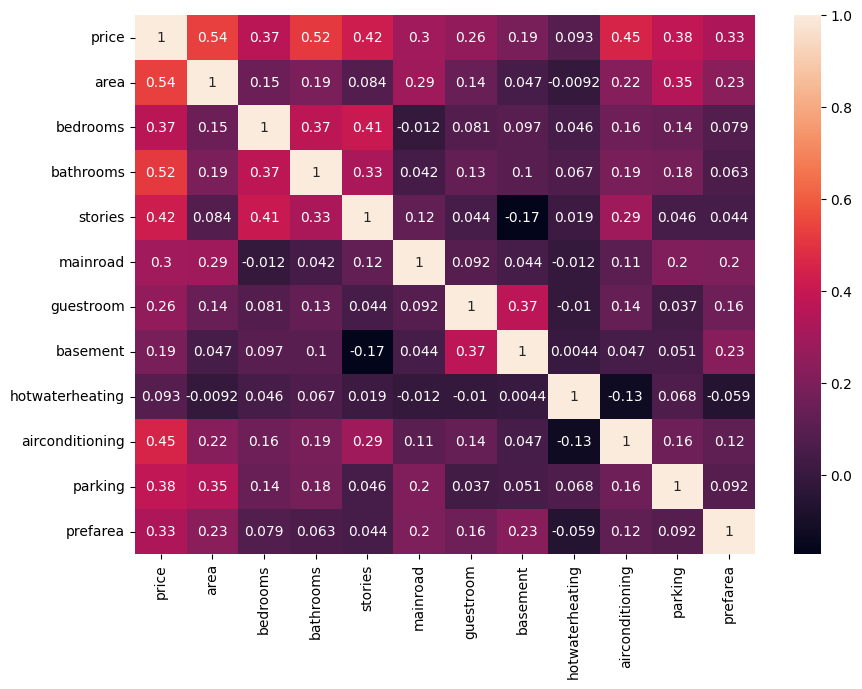

In [69]:
plt.figure(figsize=(10, 7))
sns.heatmap(data=df.corr(), annot=True)

In [70]:
x = df.iloc[:, 1:]
y = df.iloc[:, :1]

In [71]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns = x.columns)
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [73]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

### LinearRegression

In [74]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test) * 100

65.49615837553934

In [75]:
print(mean_squared_error(y_test, lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

1590022310748.239
918022.175308945
1260960.8680479499


In [76]:
lr.coef_.ravel() # .ravel() use for convert 2d to 1d

array([524300.29371626,  55539.71622156, 570262.34257549, 348731.65613386,
       144310.44415338, 109752.94436218, 210850.20135014, 152614.70408043,
       367710.15062599, 236552.13737795, 271583.68493506])

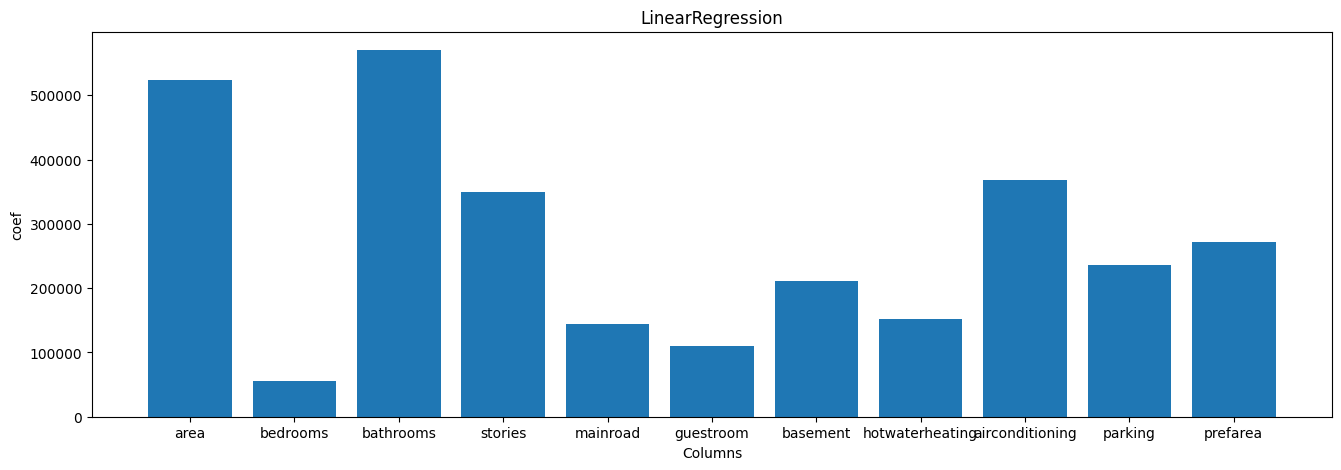

In [77]:
plt.figure(figsize=(16, 5))
plt.bar(x.columns, lr.coef_.ravel())
plt.title("LinearRegression")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.show()

### Lasso

In [78]:
la = Lasso(alpha=0.5)
la.fit(x_train, y_train)
la.score(x_test, y_test) * 100

65.49614728166182

In [79]:
print(mean_squared_error(y_test, la.predict(x_test)))
print(mean_absolute_error(y_test, la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, la.predict(x_test))))

1590022821981.5374
918022.2783670578
1260961.0707637002


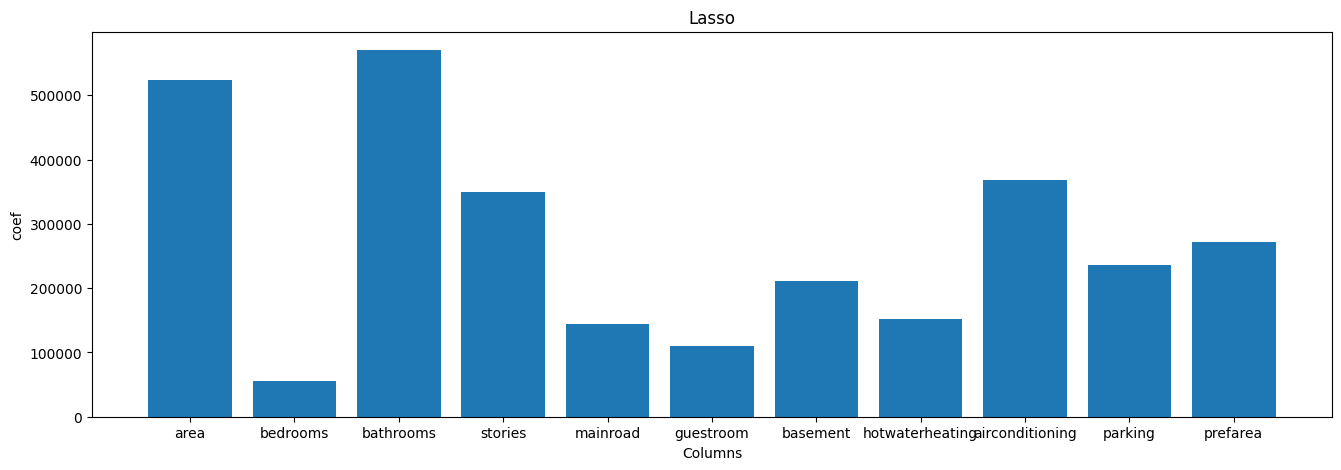

In [80]:
plt.figure(figsize=(16, 5))
plt.bar(x.columns, la.coef_.ravel())
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.show()

### Ridge

In [81]:
ri = Ridge(alpha=0.5)
ri.fit(x_train, y_train)
ri.score(x_test, y_test)*100

65.4936989994304

In [82]:
print(mean_squared_error(y_test, ri.predict(x_test)))
print(mean_absolute_error(y_test, ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, ri.predict(x_test))))

1590135644878.5745
917985.9379715767
1261005.8068377697


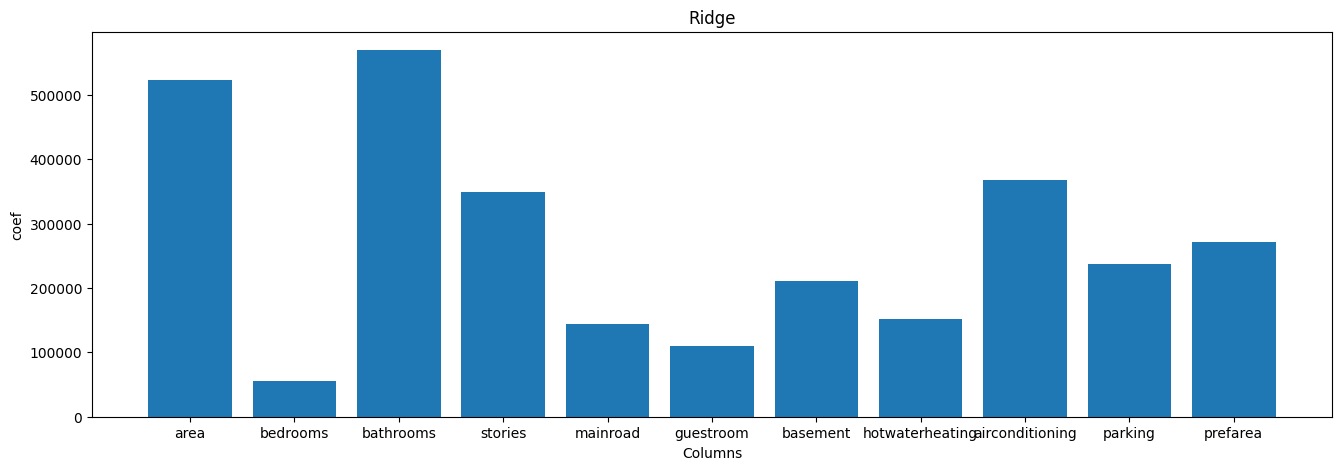

In [83]:
plt.figure(figsize=(16, 5))
plt.bar(x.columns, ri.coef_.ravel())
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.show()

In [84]:
dfa = pd.DataFrame({"col_name":x.columns, "LinearRegression":lr.coef_.ravel(), "Lasso":la.coef_.ravel(), "Ridge":ri.coef_.ravel()})
dfa

,col_name,LinearRegression,Lasso,Ridge
0,area,524300.293716,524300.178373,523795.450357
1,bedrooms,55539.716222,55539.633474,56037.734242
2,bathrooms,570262.342575,570262.136061,569584.353335
3,stories,348731.656134,348731.313516,348312.332721
4,mainroad,144310.444153,144310.170183,144420.557514
5,guestroom,109752.944362,109752.750291,109913.071141
6,basement,210850.201350,210849.832644,210536.536009
7,hotwaterheating,152614.704080,152614.213917,152429.097289
8,airconditioning,367710.150626,367709.944565,367523.122836
9,parking,236552.137378,236551.886698,236537.276924


In [85]:
# At above we can show Lasso have high Accureccy than other so here we are use Lasso